In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generation Data

In [4]:
np.random.seed(0)

# Generate main data cluster
surface_main = np.random.uniform(10, 160, 300)
noise = np.random.normal(0, surface_main * 8, 300)
loyer_main = 35 * surface_main + 500 + noise
loyer_main[loyer_main < 0] = np.random.uniform(300, 500, size=len(loyer_main[loyer_main < 0]))

# Define and add outliers
surface_outliers = np.array([180, 170, 190, 230, 270, 350, 350, 350, 420])
loyer_outliers = np.array([9500, 7400, 20000, 12000, 6000, 14200, 15000, 16100, 25000])

surface_total = np.concatenate([surface_main, surface_outliers])
loyer_total = np.concatenate([loyer_main, loyer_outliers])

# Create the DataFrame
df = pd.DataFrame({
    'Surface': surface_total,
    'Loyer': loyer_total
})

print(df.head())

      Surface        Loyer
0   92.322026  3846.862900
1  117.278405  4822.582746
2  100.414506  3534.674138
3   91.732477  3536.035513
4   73.548220  2236.290537


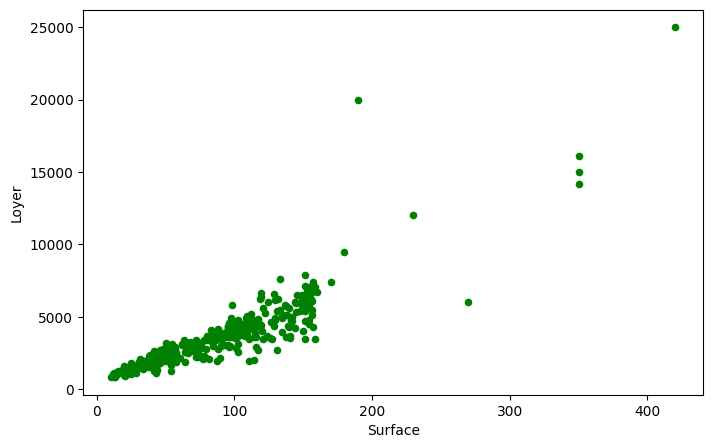

In [5]:
# Create and display the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Surface'], df['Loyer'], c='green', s=20)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()

# Partie1: Régression Linéaire Simple Numpy

In [65]:
# X and y for linear regression from df
x = df['Surface'].values
y = df['Loyer'].values

In [35]:
x.shape

(309,)

In [36]:
y.shape

(309,)

## Équation Normale

In [66]:
X = df['Surface'].values.reshape(-1, 1)
X = np.hstack((X, np.ones((len(X), 1))))

In [31]:
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [67]:
print(f"Calculated Slope (a1): {a[0]:.2f}")
print(f"Calculated Intercept (a0): {a[1]:.2f}")

Calculated Slope (a1): 40.98
Calculated Intercept (a0): -37.25


In [68]:
# --- 3. Define the Model and Plot ---
def model(X, a):
  return X.dot(a)

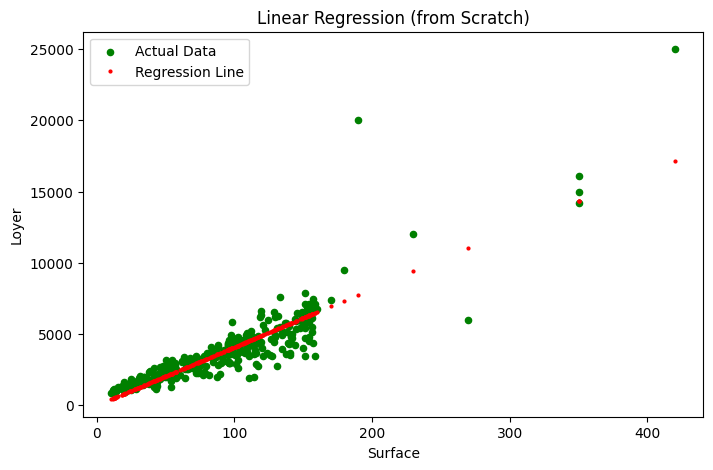

In [73]:
# Plot the original data and the regression line
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c='green', s=20, label='Actual Data')
plt.plot(X[:, 0], model(X, a), 'r.', markersize=4, label='Regression Line')
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.title('Linear Regression (from Scratch)')
plt.legend()
plt.show()

In [74]:
def cost_function(X, y, a):
 m = len(y)
 return 1/(2*m) * np.sum((model(X, a) - y)**2)
cost_function(X, y, a)

np.float64(723693.3365029618)

## Descente de gradient

Résultats de la descente de gradient ✅
Pente (m) trouvée : 2285.97
Intercept (b) trouvé : 3698.56

Note: Ces valeurs sont pour les données normalisées.


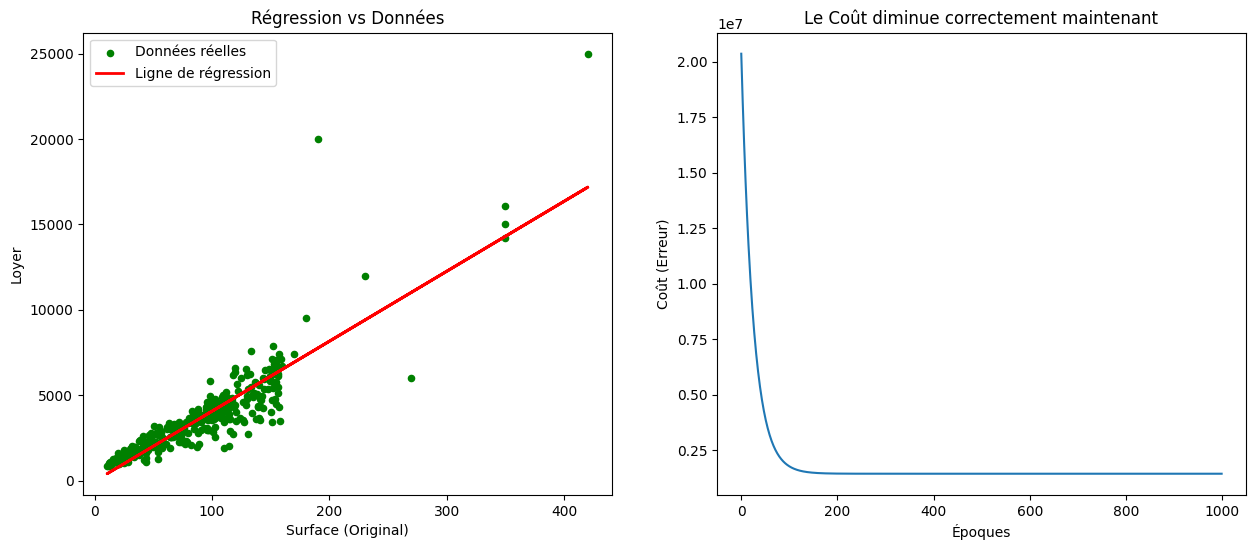

In [76]:
x = df['Surface'].values
y = df['Loyer'].values

# On centre les données autour de 0 et on réduit leur échelle.
x_scaled = (x - np.mean(x)) / np.std(x)

# --- 2. Initialisation des paramètres ---
m = 0.0 # Pente (slope)
b = 0.0 # Intercept

# --- 3. Hyperparamètres ---
# Avec les données normalisées, on peut utiliser un learning rate plus "normal"
learning_rate = 0.01
epochs = 1000

n = float(len(x_scaled))

# --- 4. La boucle de la Descente de Gradient  ---
cost_history = []
for i in range(epochs):
    # Prédire Y en utilisant les données normalisées x_scaled
    Y_pred = m * x_scaled + b

    # Calculer les gradients
    D_m = (-2/n) * sum(x_scaled * (y - Y_pred))
    D_b = (-2/n) * sum(y - Y_pred)

    # Mettre à jour la pente et l'intercept
    m = m - learning_rate * D_m
    b = b - learning_rate * D_b

    # Optionnel: suivre le coût
    cost = np.mean((y - Y_pred)**2)
    cost_history.append(cost)

# --- 5. Affichage des résultats ---
print("Résultats de la descente de gradient ✅")
print(f"Pente (m) trouvée : {m:.2f}")
print(f"Intercept (b) trouvé : {b:.2f}")
print("\nNote: Ces valeurs sont pour les données normalisées.")

# --- 6. Visualisation ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1 : La ligne de régression
ax1.scatter(x, y, c='green', s=20, label='Données réelles')
ax1.plot(x, m * x_scaled + b, color='red', linewidth=2, label='Ligne de régression')
ax1.set_xlabel('Surface (Original)')
ax1.set_ylabel('Loyer')
ax1.set_title('Régression vs Données')
ax1.legend()

# Graphique 2 : L'évolution de la fonction de coût
ax2.plot(range(epochs), cost_history)
ax2.set_xlabel('Époques')
ax2.set_ylabel('Coût (Erreur)')
ax2.set_title('Le Coût diminue correctement maintenant')

plt.show()

# Partie B : sklearn

In [38]:
X = df[['Surface']] # DataFrame with one column
y = df['Loyer']     # Series

In [37]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()

In [39]:
# Fit the model to your data
sklearn_model.fit(X, y)

LinearRegression()

In [40]:
# --- Results ---
# Access the coefficients from the sklearn model
slope = sklearn_model.coef_[0]
intercept = sklearn_model.intercept_

print(f"Model Equation: Loyer = {slope:.2f} * Surface + {intercept:.2f}")
print(f"R-squared score: {sklearn_model.score(X, y):.2f}")

Model Equation: Loyer = 40.98 * Surface + -37.25
R-squared score: 0.78


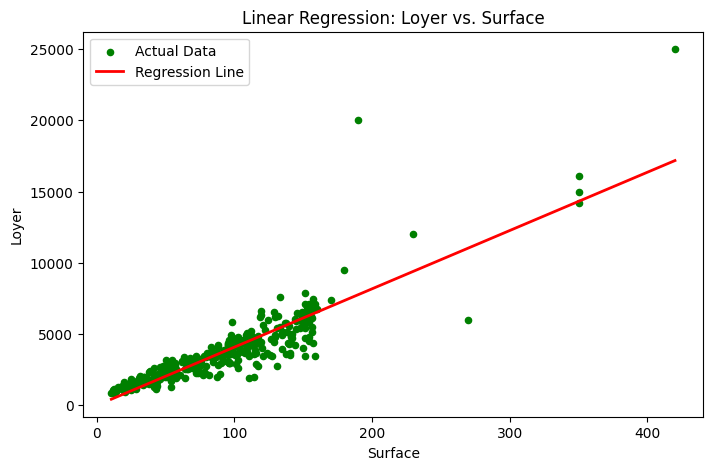

In [41]:
# --- 4. Visualize the Regression Line ---
plt.figure(figsize=(8, 5))
# Plot the original data points
plt.scatter(X, y, c='green', s=20, label='Actual Data')

# Plot the regression line
# We create points for the line from the min to max surface value
x_line = np.linspace(X.min(), X.max(), 100)
# Use the sklearn model for prediction
y_line = sklearn_model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.title('Linear Regression: Loyer vs. Surface')
plt.legend()
plt.show()

# Partie C: Regression linéaire avec Tensor Flow

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Préparation des données ---
# Extraire les données du DataFrame
x = df['Surface'].values
y = df['Loyer'].values

In [45]:
# --- 2. Création du modèle ---
# Nous utilisons un modèle séquentiel, qui est une simple pile de couches.
# Pour la régression linéaire, une seule couche "Dense" avec une seule unité suffit.
model = tf.keras.Sequential([
    # La couche a 1 neurone (pour 1 sortie) et attend 1 variable en entrée (input_shape=[1])
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [46]:
# --- 3. Compilation du modèle ---
# Avant l'entraînement, nous devons configurer le processus d'apprentissage.
# - L'optimiseur ajuste les poids du modèle pour réduire l'erreur. Adam est un bon choix par défaut.
# - La fonction de perte (loss) mesure l'erreur du modèle. 'mean_squared_error' est standard pour la régression.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [47]:
# --- 4. Entraînement du modèle ---
# Nous entraînons le modèle en lui montrant les données (x, y) plusieurs fois (epochs).
# Le modèle va progressivement ajuster sa ligne pour mieux correspondre aux points.
# verbose=0 désactive l'affichage de la progression pour chaque epoch.
history = model.fit(x, y, epochs=100, verbose=0)

In [48]:
# --- 5. Affichage des résultats et visualisation ---
# Récupérer les poids appris par le modèle (le coefficient et l'intercept)
weights = model.layers[0].get_weights()
slope = weights[0][0][0]
intercept = weights[1][0]

print(f"Modèle entraîné par TensorFlow 🧠")
print(f"Coefficient (pente) trouvé : {slope:.2f}")
print(f"Intercept trouvé : {intercept:.2f}")

Modèle entraîné par TensorFlow 🧠
Coefficient (pente) trouvé : 39.88
Intercept trouvé : 41.35


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


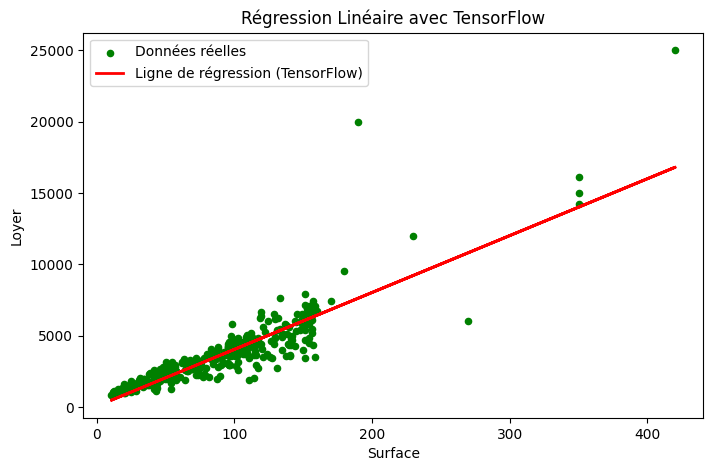

In [49]:
# Visualisation de la ligne de régression
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c='green', s=20, label='Données réelles')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Ligne de régression (TensorFlow)')
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.title('Régression Linéaire avec TensorFlow')
plt.legend()
plt.show()